## Recreation of Y.Gal (Deep bayesian active learning with Image Data)


In [1]:
%load_ext autoreload

In [2]:
import os, sys, importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setting basic paths
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

In [4]:
# Make modules availabel
sys.path.append(MODULES_PATH)

In [5]:
from active_learning import ExperimentSuitMetrics
from utils import MetricsTransformer

# Check metrics

- Experiments repeated 3 times
- Results averaged

</br>


Pool/Dataset parameters

- Initial training set: 20 data points
- Validation set: 100 data points (for weight decay optimization)
- Test set: 10K data points
- Rest: Used as pool set

</br>

Active learning parameters:

- acquisition process repeated 100-times
- (step size) 10 points per run, that maximised acquisition function (over pool set)


In [6]:
%autoreload 2
GAL_METRICS_PATH = os.path.join(METRICS_PATH, "y_gal_external")
metrics_handler = ExperimentSuitMetrics(GAL_METRICS_PATH)
metrics_transformer = MetricsTransformer()

In [7]:
dtypes = {
    "iteration": int, 
    "labeled_pool_size": int, 
    "eval_time": float, 
    "eval_accuracy": float, 
    "train_time": float, 
    "eval_loss": float
}

# Load mc dropout runs
df_randoms = metrics_transformer.load_from_dir(metrics_handler, "mc_dropout_random", dtype=dtypes)
df_bald = metrics_transformer.load_from_dir(metrics_handler, "mc_dropout_bald", dtype=dtypes)
df_max_entropy = metrics_transformer.load_from_dir(metrics_handler, "mc_dropout_max_entropy", dtype=dtypes)
df_std_mean = metrics_transformer.load_from_dir(metrics_handler, "mc_dropout_std_mean", dtype=dtypes)
df_max_var_ratio = metrics_transformer.load_from_dir(metrics_handler, "mc_dropout_max_var_ratio", dtype=dtypes)

In [8]:
%autoreload 2

# Calculate means of n-experiments
columns = ["iteration", "eval_accuracy", "eval_loss", "labeled_pool_size"]
dtype = {"labeled_pool_size": int}
df_random_mean = metrics_transformer.mean(df_randoms, columns, dtype)
df_random_mean.insert(0, "method", "Random")

df_bald_mean = metrics_transformer.mean(df_bald, columns, dtype)
df_bald_mean.insert(0, "method", "BALD")

df_max_ent_mean = metrics_transformer.mean(df_max_entropy, columns, dtype)
df_max_ent_mean.insert(0, "method", "Max. Entropy")

df_st_mean = metrics_transformer.mean(df_std_mean, columns, dtype)
df_st_mean.insert(0, "method", "Std. Mean")

df_max_var_mean = metrics_transformer.mean(df_max_var_ratio, columns, dtype)
df_max_var_mean.insert(0, "method", "Max. Var. Ratio")

In [9]:
merged = [df_random_mean, df_bald_mean, df_max_ent_mean, df_st_mean, df_max_var_mean]
merged = pd.concat(merged)

In [51]:
# Load moment propagation, runs
dtypes = {
    "iteration": int, 
    "labeled_pool_size": int, 
    "eval_time": float, 
    "eval_accuracy": float, 
    "train_time": float, 
    "eval_loss": float
}

df_mp_randoms = metrics_transformer.load_from_dir(metrics_handler, "moment_propagation_random", dtype=dtypes)
df_mp_max_entropy = metrics_transformer.load_from_dir(metrics_handler, "moment_propagation_max_entropy", dtype=dtypes)
df_mp_max_var_ratio = metrics_transformer.load_from_dir(metrics_handler, "moment_propagation_max_var_ratio", dtype=dtypes)
df_mp_std_mean = metrics_transformer.load_from_dir(metrics_handler, "moment_propagation_std_mean", dtype=dtypes)

In [52]:
mp_merged = pd.concat([df_mp_randoms, df_mp_max_entropy, df_mp_max_var_ratio, df_mp_std_mean])

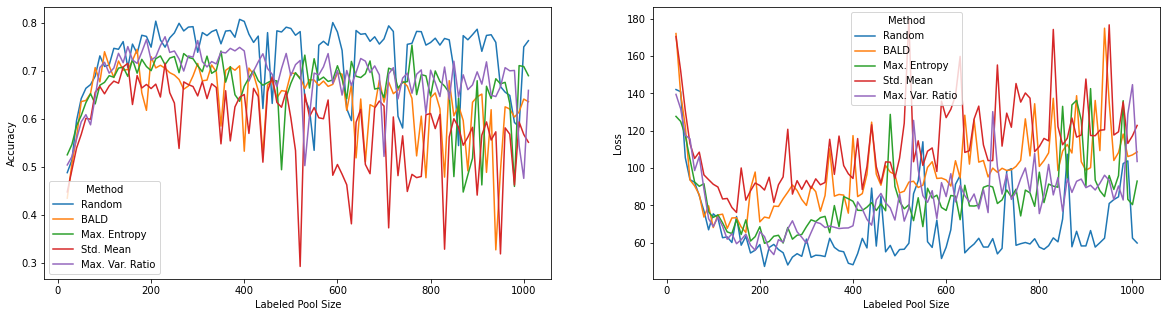

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# MC evaluation accuracy
sns.lineplot(ax=ax[0], data=merged, x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[0].set_xlabel("Labeled Pool Size")
ax[0].set_ylabel("Accuracy")
ax[0].legend(title="Method")

# MC evaluation loss
sns.lineplot(ax=ax[1], data=merged, x="labeled_pool_size", y="eval_loss", hue="method")
ax[1].set_xlabel("Labeled Pool Size")
ax[1].set_ylabel("Loss")
ax[1].legend(title="Method")

#fig.suptitle("MC Dropout")

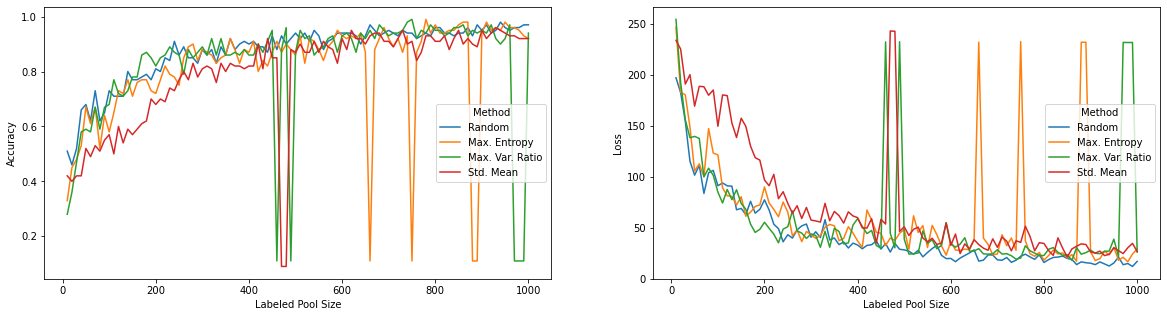

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Moment Propagation eval accuracy
sns.lineplot(ax=ax[0], data=mp_merged, x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[0].set_xlabel("Labeled Pool Size")
ax[0].set_ylabel("Accuracy")
ax[0].legend(title="Method")

sns.lineplot(ax=ax[1], data=mp_merged, x="labeled_pool_size", y="eval_loss", hue="method")
ax[1].set_xlabel("Labeled Pool Size")
ax[1].set_ylabel("Loss")
ax[1].legend(title="Method")

# fig.suptitle("Moment Propagation")